# Systems of Equations

In [1]:
import numpy as np
import scipy.integrate as spi
import scipy.linalg as la
import matplotlib.pyplot as plt

## Learning Goals

* Classify systems of differential equations: order, dimension, linear, autonomous
* Transform higher order systems of differential equations into first order systems
* Compute and visualize numerical solutions of systems of differential equations
* Compute and classify equilibrium solutions of autonomous systems of differential equations

## Classification

A **system of differential equations** is a collection of equations involving unknown functions $y_0(t),\dots,y_{d-1}(t)$ (with the same independent variable $t$) and their derivatives. The **dimension** of a system of differential equations is the number $d$ of unknown functions $y_0,\dots,y_{d-1}$ in the system. The **order** of a system of differential equations is the highest order derivative of any of the unknown functions appearing in the system. A system of differential equations is **linear** if each equation in the system is linear. A system of differential equations is **autonomous** if each equation in the system is autonomous.

For example, the system of differential equations

$$
\begin{align*}
x' &= x - xy \\
y' &= xy - y
\end{align*}
$$

is a first order, 2-dimensional, autonomous, nonlinear system of differential equations, and the system

$$
\begin{align*}
x'' &= x - y \\
y' &= x - t
\end{align*}
$$

is a second order, 2-dimensional, nonautonomous, linear system of differential equations.

:::{seealso}
Check out [Notes on Diffy Qs: Section 3.1](https://www.jirka.org/diffyqs/html/sec_introtosys.html) for more information about systems of differential equations.
:::

## First Order Transformation

A first order, $d$-dimensional system of differential equations is of the form

$$
\begin{align*}
u_0' &= f_0(t,u_0,\dots,u_{d-1}) \\
u_1' &= f_1(t,u_0,\dots,u_{d-1}) \\
& \ \ \vdots \\
u_{d-1}' &= f_{d-1}(t,u_0,\dots,u_{d-1}) \\
\end{align*}
$$

for some functions $f_0,\dots,f_{d-1}$. Introduce vector notation

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(t,\mathbf{u})
$$

where

$$
\mathbf{u}(t) = \begin{bmatrix} u_0(t) \\ \vdots \\ u_{d-1}(t) \end{bmatrix}
\hspace{10mm}
\frac{d \mathbf{u}}{dt} = \begin{bmatrix} u_0'(t) \\ \vdots \\ u_{d-1}'(t) \end{bmatrix}
\hspace{10mm}
\mathbf{f}(t,\mathbf{u}) = \begin{bmatrix} f_0(t,u_0,\dots,u_{d-1}) \\ \vdots \\ f_{d-1}(t,u_0,\dots,u_{d-1}) \end{bmatrix}
$$

Any system of differential equations can be written as a first order system by introducing new variables. The procedure is as follows:

1. Identify the order of each unknown function in the system.
2. If $y$ has order $n$ then introduce $n-1$ new variables for $y$ and its derivatives: $u_0 = y, u_1 = y',\dots,u_{n-1} = y^{(n-1)}$.
3. Rewrite the equations for $u_0',\dots,u_{n-1}'$ in terms of the new variables only.

For example, consider a 1-dimensional, second order, linear equation with constant coefficients

$$
ay'' + by' + cy = f(t) \ \ , \ \ \ a,b,c \in \mathbb{R}
$$

There is only one unknown function $y$ and it has order 2 therefore we introduce $u_0 = y$ and $u_1 = y'$ and write

$$
\begin{align*}
u_0' &= u_1 \\
u_1' &= \frac{1}{a} \left( f(t) - bu_1 - cu_0 \right)
\end{align*}
$$

Let's try another example. Consider the following the system

$$
\begin{align*}
x'' &= 1 - y \\
y'' &= 1 - x
\end{align*}
$$

Both $x$ and $y$ are second order therefore we introduce new variables $u_0 = x, u_1 = x', u_2 = y, u_3 = y'$ and write

$$
\begin{align*}
u_0' &= u_1 \\
u_1' &= 1 - u_2 \\
u_2' &= u_3 \\
u_3' &= 1 - u_0
\end{align*}
$$

:::{seealso}
Check out [Notes on Diffy Qs: Section 3.1](https://www.jirka.org/diffyqs/html/sec_introtosys.html) for more examples of transforming higher order systems into first order systems.
:::

## Euler's Method for Systems

We have seen numerical methods for first order scalar equations. How do we apply these methods to systems? First, transform the system into a first order system and then apply the method to each equation in the system simultaneously.

For example, let's apply Euler's method to a 2-dimensional, first order system

$$
\begin{align*}
x' &= f_1(t,x,y) \\
y' &= f_2(t,x,y)
\end{align*}
$$

Starting with initial values $x_0 = x(t_0)$ and $y_0 = y(t_0)$ we define the resursive sequences

$$
\begin{align*}
x_{n+1} &= x_n + h f_1(t_n,x_n,y_n) \\
y_{n+1} &= y_n + h f_2(t_n,x_n,y_n)
\end{align*}
$$

where $t_n = t_0 + nh$ for step size $h$. Use vector notation to write

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + h \, \mathbf{f}(t_n,\mathbf{u}_n)
$$

where

$$
\mathbf{u}_n = \begin{bmatrix} x_n \\ y_n \end{bmatrix}
$$

Let's write a function to implement Euler's method for systems:

In [2]:
def odeEulerSys(f,t,u0):
    u = np.zeros([len(t),len(u0)])
    u[0,:] = u0
    for n in range(0,len(t)-1):
        u[n+1,:] = u[n,:] + f(t[n],u[n,:])*(t[n+1] - t[n])
    return u

Use `odeEulerSys` to approximate the solution of the equation

$$
y'' + y + 1 = 0 \ , \ \ y(0)=1 \ , \ \ y'(0) = 0
$$

and compare with the exact solution

$$
y(t) = e^{-t/2} \cos \left( \frac{\sqrt{3}}{2} t \right) + \frac{1}{\sqrt{3}} e^{-t/2} \sin \left( \frac{\sqrt{3}}{2} t \right)
$$

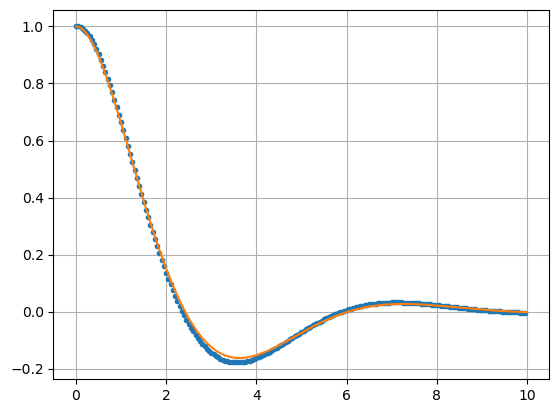

In [3]:
a = 1; b = 1; c = 1; tf = 10;

f = lambda t,u: np.array([u[1],(-b*u[1]-c*u[0])/a])
t = np.arange(0,tf,0.05)
u0 = [1,0]
u = odeEulerSys(f,t,u0)
plt.plot(t,u[:,0],'.')

T = np.linspace(0,tf,tf*50)
Y = np.exp(-T/2)*(np.cos(np.sqrt(3)/2*T) + 1/np.sqrt(3)*np.sin(np.sqrt(3)/2*T))
plt.plot(T,Y), plt.grid(True)
plt.show()

:::{seealso}
Check out [Mathematical Python: Systems of Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/) for more Python examples using Euler's method.
:::

## Numerical Solutions with SciPy

Euler's method is simple to understand but it is not accurate enough to use in practice. Higher order [Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge–Kutta_methods) are the standard methods used for real applications but we won't get into how they work exactly. Instead, let's just loosely describe a Runge-Kutta method as a "higher order Euler method" and let's focus on how `scipy.integrate.odeint` works with systems of differential equations.

The procedure to compute a numerical approximation of a solution of a system of differential equations is:

1. Write the system as a first order system $\mathbf{u}' = \mathbf{f}(\mathbf{u},t)$, $\mathbf{u}_0 = \mathbf{u}(t_0)$.
2. Define a Python function `f(u,t)` for the right hand side $\mathbf{f}(\mathbf{u},t)$ where parameter `u` is a vector such that `u[k]` corresponds to funciton $u_k(t)$. Note that the variable $\mathbf{u}$ is first and $t$ is second.
3. Define vector `t` of $t$ values where `t[0]` is $t_0$. Usually `t = np.linspace(t0,tf,N+1)` or equivalently `t = np.arange(t0,tf+h,h)` where $h = (t_f - t_0)/N$.
4. Define initial value vector `u0` corresponding to $\mathbf{u}_0 = \mathbf{u}(t_0)$ where $t_0$ is `t[0]`.
5. Compute the solution `u = spi.odeint(f,u0,t)`. The output of the function is the matrix `u` of shape `(len(t),len(u0))` such that column `u[:,k]` corresponds to the values of the function $u_k(t)$ from $t_0$ to $t_f$, and row `u[n,:]` corresponds to the vector $\mathbf{u}(t_n) = (u_0(t_n),\dots,u_{d-1}(t_n))$ at time $t_n$.

For example, let's approximate the solution of the equation

$$
y'' + y + 1 = 0 \ , \ \ y(0)=1 \ , \ \ y'(0) = 0
$$

and compare with the exact solution

$$
y(t) = e^{-t/2} \cos \left( \frac{\sqrt{3}}{2} t \right) + \frac{1}{\sqrt{3}} e^{-t/2} \sin \left( \frac{\sqrt{3}}{2} t \right)
$$

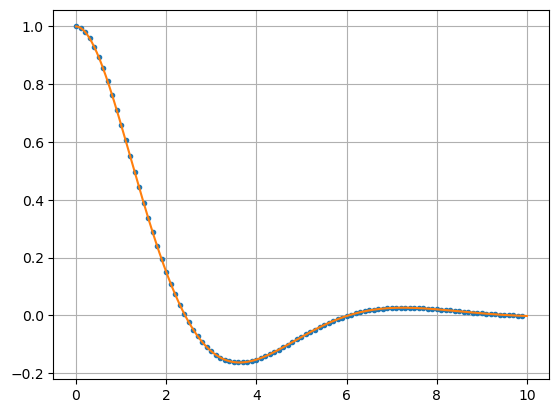

In [4]:
a = 1; b = 1; c = 1; tf = 10;

f = lambda u,t: np.array([u[1],(-b*u[1]-c*u[0])/a])
t = np.arange(0,tf,0.1)
u0 = [1,0]
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0],'.')

T = np.linspace(0,tf,tf*50)
Y = np.exp(-T/2)*(np.cos(np.sqrt(3)/2*T) + 1/np.sqrt(3)*np.sin(np.sqrt(3)/2*T))
plt.plot(T,Y), plt.grid(True)
plt.show()

:::{seealso}
Check out [Mathematical Python: Systems of Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/systems/) for more Python examples, and [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for more information about `scipy.integrate.odeint`.
:::

## Linear Stability Analysis

Consider a first order, $d$-dimensional autonomous system of differential equations

$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x})
$$

A point $\mathbf{c} \in \mathbb{R}^d$ is a **critical point** if $\mathbf{f}(\mathbf{c}) = \mathbf{0}$. A critical point corresponds to an **equilibrium solution** (also called a **steady state solution**)

$$
\mathbf{x}(t) = \mathbf{c}
$$

A critical point $\mathbf{c}$ is an **attractor** if all solutions which start near $\mathbf{c}$ converge to $\mathbf{c}$ as $t \to \infty$. A critical point $\mathbf{c}$ is a **repeller** if all solutions which start near $\mathbf{c}$ diverge from $\mathbf{c}$ as $t \to \infty$. A critical point $\mathbf{c}$ is a **unstable** if some solutions which start near $\mathbf{c}$ converge to $\mathbf{c}$ and some diverge as $t \to \infty$.

Let $\mathbf{c}$ be a critical point and let $\mathbf{J}_{\mathbf{c}}$ be the Jacobian of the system at $\mathbf{c}$:

$$
\mathbf{J}_{\mathbf{c}} =
\begin{bmatrix}
\frac{\partial f_0}{\partial x_0} & \cdots & \frac{\partial f_0}{\partial x_{d-1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_{d-1}}{\partial x_0} & \cdots & \frac{\partial f_{d-1}}{\partial x_{d-1}}
\end{bmatrix} _{\mathbf{x} = \mathbf{c}}
$$

The [linearization theorem](https://en.wikipedia.org/wiki/Hartman–Grobman_theorem) allows us to classify critical points:

* if $\mathrm{Re}(\lambda) < 0$ for each eigenvalue $\lambda$ of $\mathbf{J}_{\mathbf{c}}$ then $\mathbf{c}$ is a attractor
* if $\mathrm{Re}(\lambda) > 0$ for each eigenvalue $\lambda$ of $\mathbf{J}_{\mathbf{c}}$ then $\mathbf{c}$ is a repeller
* if some eigenvalues of $\mathbf{J}_{\mathbf{c}}$ have positive real part and some have negative real part then $\mathbf{c}$ is unstable

For example, let's find and classify the critical points of the system

$$
\begin{align*}
x' &= 1 - y^2 \\
y' &= x - y
\end{align*}
$$

There are 2 critical points: $(1,1)$ and $(-1,-1)$. Compute partial derivatives

$$
\frac{\partial f_1}{\partial x} = 0 \hspace{10mm}
\frac{\partial f_1}{\partial y} = -2y \hspace{10mm}
\frac{\partial f_2}{\partial x} = 1 \hspace{10mm}
\frac{\partial f_2}{\partial y} = -1
$$

Compute eigenvalues of the Jacobians

$$
\mathbf{J}_{(1,1)} = \begin{bmatrix} 0 & -2y \\ 1 & -1 \end{bmatrix}_{(1,1)} = \begin{bmatrix} 0 & -2 \\ 1 & -1 \end{bmatrix}
$$

$$
\mathbf{J}_{(-1,-1)} = \begin{bmatrix} 0 & -2y \\ 1 & -1 \end{bmatrix}_{(-1,-1)} = \begin{bmatrix} 0 & 2 \\ 1 & -1 \end{bmatrix}
$$

In [5]:
J1 = np.array([[0.,-2.],[1.,-1.]])
evals1,evecs1 = la.eig(J1)
print(evals1)

[-0.5+1.32287566j -0.5-1.32287566j]


In [6]:
J2 = np.array([[0.,2.],[1.,-1.]])
evals2,evecs2 = la.eig(J2)
print(evals2)

[ 1.+0.j -2.+0.j]


Therefore $(1,1)$ is an attractor and $(-1,-1)$ is unstable. Let's plot solutions:

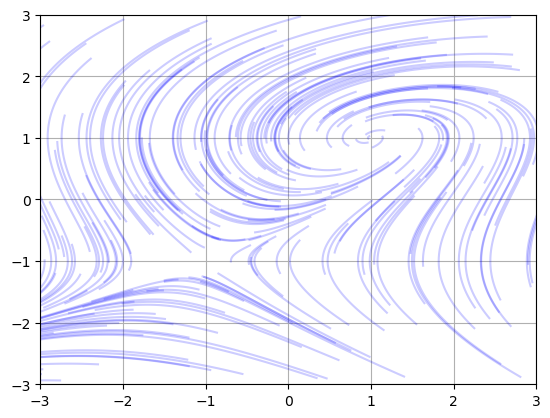

In [7]:
f = lambda u,t: np.array([1 - u[1]**2,u[0] - u[1]])
t = np.linspace(0,1,100)
for _ in range(200):
    u0 = 6*np.random.rand(2) - 3
    u = spi.odeint(f,u0,t)
    plt.plot(u[:,0],u[:,1],c='b',alpha=0.2)
plt.axis([-3,3,-3,3]), plt.grid(True)
plt.show()

:::{seealso}
Check out [Notes on Diffy Qs: Section 8.1](https://www.jirka.org/diffyqs/html/linearization_section.html) and [Section 8.2](https://www.jirka.org/diffyqs/html/nlinstability_section.html) for more information and examples about linear classification of critical points. 
:::